<a href="https://colab.research.google.com/github/reonho/bt2101disrudy/blob/master/BT2101_disrudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BT2101 DISRUDY GROUP PROJECT

## Table of Contents
1. Problem Description (Brief Write Up)
2. Exploratory Data Analysis (EDA)
3. Data Pre-processing
4. Model Selection
5. Evaluation
6. Discussion and Possible Improvements

## 1. Problem Description

The data set we will be working on contains payment information of 30,000 credit card holders obtained from a bank in Taiwan. 

Each data sample is described by 23 feature attributes and a binary target feature (default or not) valued 0 (= not default) or 1 (= default). 

The 23 explanatory attributes are:

### X1 - X5: Indivual attributes of customer

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 

X2: Gender (1 = male; 2 = female). 

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

X4: Marital status (1 = married; 2 = single; 3 = others). 

X5: Age (year). 

### X6 - X11: Repayment history from April to Septemeber 2005
The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months, . . . 8 = payment delay for eight months; 9 = payment delay for nine months and above.


X6 = the repayment status in September, 2005

X7 = the repayment status in August, 2005

X8 = the repayment status in July, 2005

X9 = the repayment status in June, 2005

X10 = the repayment status in May, 2005

X11 = the repayment status in April, 2005. 

### X12 - X17: Amount of bill statement (NT dollar) from April to September 2005

X12 = amount of bill statement in September, 2005; 

X13 = amount of bill statement in August, 2005

. . .

X17 = amount of bill statement in April, 2005. 

### X18 - X23: Amount of previous payment (NT dollar)
X18 = amount paid in September, 2005

X19 = amount paid in August, 2005

. . .

X23 = amount paid in April, 2005. 


## EDA

In this section we will explore the data set, its shape and its features to get an idea of the data.

### Importing packages and the dataset

In [0]:
import pandas as pd

In [0]:
import sklearn as sk
import matplotlib.pyplot as plt


In [0]:
url = 'https://raw.githubusercontent.com/reonho/bt2101disrudy/master/card.csv'
df = pd.read_csv(url,  header = 1, index_col = 0)
# Dataset is now stored in a Pandas Dataframe
df0 = df

In [19]:
#rename the target variable to "Y" for convenience
df["Y"] = df["default payment next month"] 
df = df.drop("default payment next month", axis = 1)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [20]:
size = df.shape

print("Data has {} Columns and {} Rows".format(size[1], size[0]))

Data has 24 Columns and 30000 Rows


In [21]:
#check for null values
df.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
Y            0
dtype: int64

In [22]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Exploring the features
We generate summary statistics for each of the attributes


**Exploring target attribute:**


In [23]:
All = df.shape[0]
default = df[df['Y'] == 1]
nondefault = df[df['Y'] == 0]

x = len(default)/All
y = len(nondefault)/All

print('defaults :',x*100,'%')
print('non defaults :',y*100,'%')

defaults : 22.12 %
non defaults : 77.88000000000001 %


Text(0, 0.5, 'Frequency')

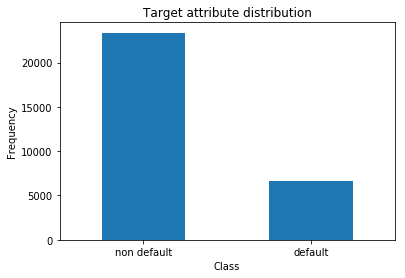

In [24]:
# plotting target attribute against frequency
labels = ['non default','default']
classes = pd.value_counts(df['Y'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Target attribute distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

**Checking of categorical attributes:**

since all categorical attributes are in numerical format, there is no need of converying categorical data

**1) Analysis of categorical data groups**

- Sex
- Education
- Marriage

In [25]:
df["SEX"].value_counts()


2    18112
1    11888
Name: SEX, dtype: int64

**2) Analysis of categorical data to default paymment(target attribute)**

- Sex
- Education
- Marriage



In [26]:
#proportion of target attribute (for reference)
print('Total target attributes:')
print('non defaults :',y*100,'%')
print('defaults :',x*100,'%')
print("--------------------------------------------------------")
#analysing default payment with Sex
sex_target = pd.crosstab(df["Y"], df["SEX"]).apply(lambda r: r/r.sum()*100).rename(columns = {1: "Male", 2: "Female"}, index = {0: "non defaults", 1: "defaults"})
print(sex_target)
print("--------------------------------------------------------")
#analysing default payment with education
education_target = pd.crosstab(df["Y"], df["EDUCATION"]).apply(lambda r: r/r.sum()*100).rename(index = {0: "non defaults", 1: "defaults"})
print(education_target)
print("--------------------------------------------------------")
#analysing default payment with marriage
marriage_target = pd.crosstab(df["Y"], df["MARRIAGE"]).apply(lambda r: r/r.sum()*100).rename(columns = {0: "unknown",1: "married", 2: "single", 3: "others"},index = {0: "non defaults", 1: "defaults"})
print(marriage_target)

Total target attributes:
non defaults : 77.88000000000001 %
defaults : 22.12 %
--------------------------------------------------------
SEX                Male     Female
Y                                 
non defaults  75.832773  79.223719
defaults      24.167227  20.776281
--------------------------------------------------------
EDUCATION         0          1          2  ...          4          5          6
Y                                          ...                                 
non defaults  100.0  80.765234  76.265146  ...  94.308943  93.571429  84.313725
defaults        0.0  19.234766  23.734854  ...   5.691057   6.428571  15.686275

[2 rows x 7 columns]
--------------------------------------------------------
MARRIAGE        unknown    married     single     others
Y                                                       
non defaults  90.740741  76.528296  79.071661  73.993808
defaults       9.259259  23.471704  20.928339  26.006192


**Conclusion**

categorical attributes SEX and MARRIAGE have approximately same distribution throughout groups of categories

**Meaning of attributes X6-X11**

The numeric value in these attributes showedthe past history of a credit card holder, example -2 means:No consumption of credit card, -1 means that holder paid thefull balance, 0 means the use of revolving credit; 1= paymentdelay of one month; 2= payment delay of two months andso on.

To find out the relationships between the features, we calculate the correlation coefficients with the target for all attributes

In [27]:
df.drop("Y", axis=1).apply(lambda x: x.corr(df.Y) if x.corr(df.Y) > 0 else -x.corr(df.Y)).sort_values(ascending = False)

PAY_0        0.324794
PAY_2        0.263551
PAY_3        0.235253
PAY_4        0.216614
PAY_5        0.204149
PAY_6        0.186866
LIMIT_BAL    0.153520
PAY_AMT1     0.072929
PAY_AMT2     0.058579
PAY_AMT4     0.056827
PAY_AMT3     0.056250
PAY_AMT5     0.055124
PAY_AMT6     0.053183
SEX          0.039961
EDUCATION    0.028006
MARRIAGE     0.024339
BILL_AMT1    0.019644
BILL_AMT2    0.014193
BILL_AMT3    0.014076
AGE          0.013890
BILL_AMT4    0.010156
BILL_AMT5    0.006760
BILL_AMT6    0.005372
dtype: float64

We observe that the "repayment status" attributes are the most highly correlated with the target variable and we would expect them to be more significant in predicting credit default.

The least correlated attributes are the bill amounts.

We can also generate a correlation matrix (heatmap) to see which features are the most correlated with each other.

Text(0.5, 1.05, 'Correlation Matrix')

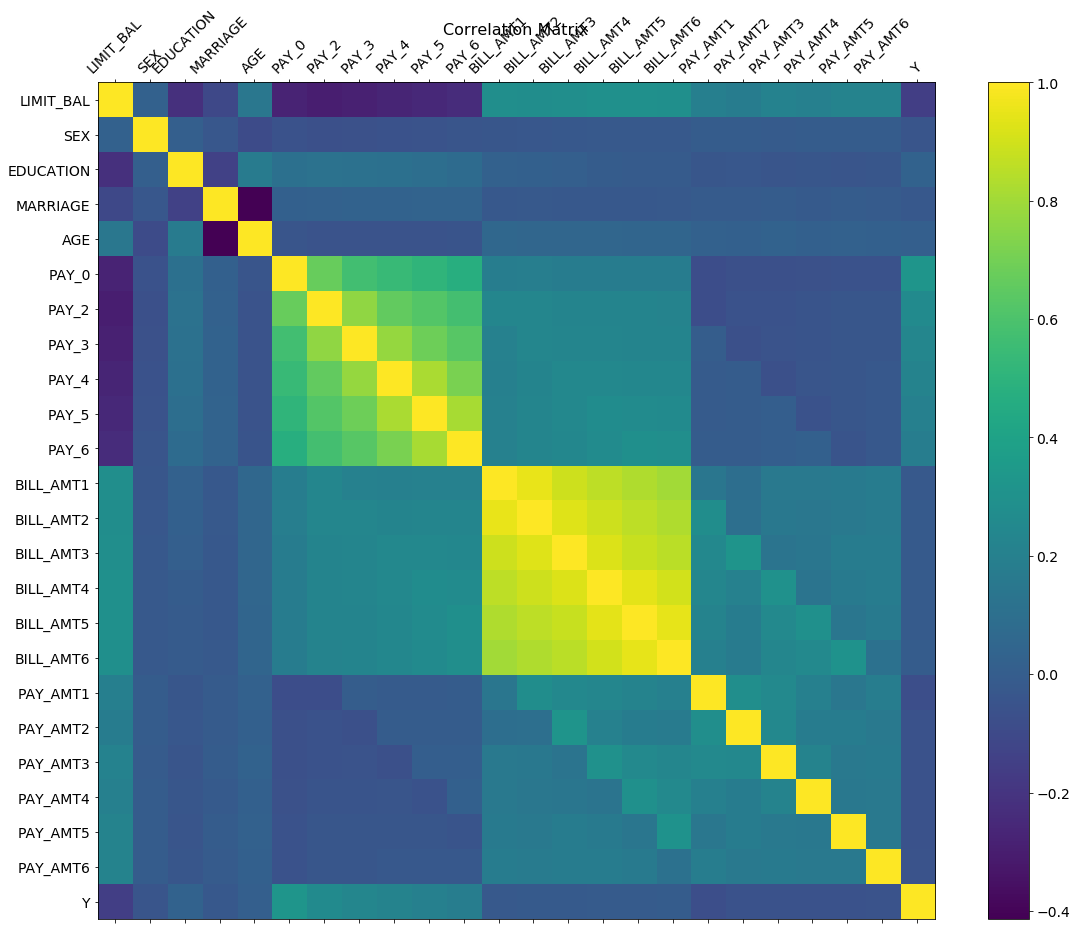

In [28]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

The heatmap reveals that the payment and billed amounts across the 5 months are highly correlated with each other

- Linear regression
- Scatterplot matrix
- Boxplot matrix

## Data Preprocessing


In [29]:
#check for null values:
df.isnull().values.any()

False

In [30]:
import sklearn.preprocessing as skp
df1 = pd.DataFrame(skp.normalize(df))
df1.columns = df.columns
df1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
0,0.969135,0.000097,0.000097,0.000048,0.001163,0.000097,0.000097,-0.000048,-0.000048,-0.000097,-0.000097,0.189611,0.150313,0.033387,0.000000,0.000000,0.000000,0.000000,0.033387,0.000000,0.000000,0.000000,0.000000,0.000048
1,0.998005,0.000017,0.000017,0.000017,0.000216,-0.000008,0.000017,0.000000,0.000000,0.000000,0.000017,0.022305,0.014346,0.022305,0.027212,0.028734,0.027121,0.000000,0.008317,0.008317,0.008317,0.000000,0.016633,0.000008
2,0.898265,0.000020,0.000020,0.000020,0.000339,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.291826,0.140000,0.135329,0.143034,0.149192,0.155190,0.015151,0.014971,0.009981,0.009981,0.009981,0.049904,0.000000
3,0.456620,0.000018,0.000018,0.000009,0.000338,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.429132,0.440483,0.450145,0.258575,0.264465,0.269835,0.018265,0.018438,0.010959,0.010046,0.009763,0.009132,0.000000
4,0.615783,0.000012,0.000025,0.000012,0.000702,-0.000012,0.000000,-0.000012,0.000000,0.000000,0.000000,0.106124,0.069830,0.441331,0.257890,0.235795,0.235611,0.024631,0.451750,0.123157,0.110841,0.008485,0.008362,0.000000
